# Machine Learning Based Heart Disease Prediction

This project uses 4 databases concerning heart disease diagnosis. Title of the database is ***Heart Disease Databases***.

All attributes are numeric-valued.  The data was collected from the four following locations:

     1. Cleveland Clinic Foundation (cleveland.data)
     2. Hungarian Institute of Cardiology, Budapest (hungarian.data)
     3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)
     4. University Hospital, Zurich, Switzerland (switzerland.data)

Each database has the same instance format.  While the databases have 76 raw attributes, only 14 of them are actually used in this project.

The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution.  They would be:

       1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
       2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
       3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
       4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
- Donor: David W. Aha (aha@ics.uci.edu) (714) 856-8779   
- Date: July, 1988

14 attributes (columns) are used :
1. age: age in years     
2. sex: sex (1 = male; 0 = female)  
3.  cp: chest pain type
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
- Value 1: upsloping
- Value 2: flat
- Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: diagnosis of heart disease from 0 (no presence) to 4

In [174]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Data Preparation and Cleaning
There are 4 data files from 4 Clinics (Cleveland: 303 rows, Hungarian: 294 rows, Switzerland: 123 rows, and Long Beach VA: 200 rows). Each data file is a text file that contains no column names. Each data is separated by a comma. Each row is ended by a newline. There is a separate description file that describes the name of the 14 columns use in each of this text file and other descriptions about the data.

In this preparation stage we will load all this data from 4 separate files, merge them into one data frame, and clean all the missing values

In [175]:
# Define the paths to the newly uploaded files
file_paths = [
    'data/processed.cleveland.data',
    'data/processed.hungarian.data',
    'data/processed.switzerland.data',
    'data/processed.va.data'
]

# Using the column names given in the description
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 
    'fbs', 'restecg', 'thalach', 'exang', 
    'oldpeak', 'slope', 'ca', 'thal', 'num'
]

# Initialize an empty list to hold the DataFrames
dfs = []

# Iterate over each file path, load the data into a DataFrame, and append it to the list
for path in file_paths:
    df = pd.read_csv(path, header=None, names=column_names).replace('?', pd.NA)
    dfs.append(df)

# Concatenate all the DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

combined_df.head(), combined_df.shape


(    age  sex   cp trestbps   chol  fbs restecg thalach exang oldpeak slope  \
 0  63.0  1.0  1.0    145.0  233.0  1.0     2.0   150.0   0.0     2.3   3.0   
 1  67.0  1.0  4.0    160.0  286.0  0.0     2.0   108.0   1.0     1.5   2.0   
 2  67.0  1.0  4.0    120.0  229.0  0.0     2.0   129.0   1.0     2.6   2.0   
 3  37.0  1.0  3.0    130.0  250.0  0.0     0.0   187.0   0.0     3.5   3.0   
 4  41.0  0.0  2.0    130.0  204.0  0.0     2.0   172.0   0.0     1.4   1.0   
 
     ca thal  num  
 0  0.0  6.0    0  
 1  3.0  3.0    2  
 2  2.0  7.0    1  
 3  0.0  3.0    0  
 4  0.0  3.0    0  ,
 (920, 14))

### Cleaning the dataframe by treating the missing values

There are 3 steps involved :
1. Check which columns have missing values.

2. Determine the strategy for each column based on its type and significance.
- For categorical columns, replacing missing values with the mode or a special category like '-1' (represents unknown) might be suitable.
- For numerical columns, imputing missing values with the median instead of mean could be appropriate given the clinical significance to minimise the impact of outliers.

3. Apply the chosen strategies to handle missing values.

In [176]:
# Check which columns have missing values in the uncleaned DataFrame
columns_with_missing_values = combined_df.isna().sum()
print("Column with missing values and their respective amount of missing values : ")
columns_with_missing_values[columns_with_missing_values > 0]

Column with missing values and their respective amount of missing values : 


trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64

***Identifying the columns with missing value***

- Categorical columns with missing values are :
1. fbs
2. restecg
3. exang
4. slope
5. thal
6. ca

- Numerical columns with missing values are :
1. trestbps
2. chol
3. thalach
4. oldpeak

***Treatment for missing values***

- Numerical columns missing values were imputed with the median.
- Categorical columns missing values were replaced with the mode of their respective columns.
- For the columns ca and thal, missing values were replaced with '-1' (which is its own separate category and represent unknown) to indicate the absence of data without assuming any clinical value because we have deduced that these 2 columns are very important in the diagnosis and imputing a value may contribute to inaaccurate diagnosis

Note : 
Since ca and thal are essential for diagnoses and can be considered categorical with clinical data , we will treat them carefully, categorizing missing values as '-1' as the value of '-1' does not hold any numeric significance (represent unknown).

- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [177]:
from sklearn.impute import SimpleImputer
# Define the list of categorical columns intended for mode imputation
categorical_columns_with_mode = ['fbs', 'restecg', 'exang', 'slope']

# Define list of numerical columns intended to be imputed with the median
numerical_columns = ['trestbps', 'chol', 'thalach', 'oldpeak']
numerical_imputer = SimpleImputer(strategy='median')

# Convert pd.NA to np.nan for numerical columns again to ensure no issues
combined_df[numerical_columns] = combined_df[numerical_columns].apply(lambda col: col.replace(pd.NA, np.nan))

# Apply median imputation for numerical columns again to be safe
combined_df[numerical_columns] = numerical_imputer.fit_transform(combined_df[numerical_columns])

# Replace missing values with 'unknown' for 'ca' and 'thal' columns
combined_df['ca'].replace(pd.NA, -1, inplace=True)
combined_df['thal'].replace(pd.NA, -1, inplace=True)

# For the categorical columns, replace missing values with the mode (now ensuring the variable is defined)
for column in categorical_columns_with_mode:
    combined_df[column] = combined_df[column].replace(pd.NA, combined_df[column].mode().iloc[0])

# Final check for missing values
final_missing_values_check_again = combined_df.isnull().sum()
final_missing_values_check_again, combined_df.head()

(age         0
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          0
 thal        0
 num         0
 dtype: int64,
     age  sex   cp  trestbps   chol  fbs restecg  thalach exang  oldpeak slope  \
 0  63.0  1.0  1.0     145.0  233.0  1.0     2.0    150.0   0.0      2.3   3.0   
 1  67.0  1.0  4.0     160.0  286.0  0.0     2.0    108.0   1.0      1.5   2.0   
 2  67.0  1.0  4.0     120.0  229.0  0.0     2.0    129.0   1.0      2.6   2.0   
 3  37.0  1.0  3.0     130.0  250.0  0.0     0.0    187.0   0.0      3.5   3.0   
 4  41.0  0.0  2.0     130.0  204.0  0.0     2.0    172.0   0.0      1.4   1.0   
 
     ca thal  num  
 0  0.0  6.0    0  
 1  3.0  3.0    2  
 2  2.0  7.0    1  
 3  0.0  3.0    0  
 4  0.0  3.0    0  )

### Exploratory Data Analysis

Read all the codes above. Try to understand it. Simply put, the name of the clean dataframe you are working with is called 'combined.df'.

In [178]:
display(combined_df)
combined_df.shape

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,0.0,4.0,127.0,333.0,1,1,154.0,0,0.0,2,-1,-1,1
916,62.0,1.0,1.0,130.0,139.0,0,1,140.0,0,0.5,2,-1,-1,0
917,55.0,1.0,4.0,122.0,223.0,1,1,100.0,0,0.0,2,-1,6,2
918,58.0,1.0,4.0,130.0,385.0,1,2,140.0,0,0.5,2,-1,-1,0


(920, 14)

**BINARY CLASSIFICATION TREE**

In [179]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]

y = pd.DataFrame(combined_df['num'].astype('category'))
X = pd.DataFrame(combined_df[predictors]) 

In [180]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=10)

In [197]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 7)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Ensure figures are displayed inline in Jupyter Notebook
%matplotlib inline

In [198]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7420289855072464

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5217391304347826



<AxesSubplot:>

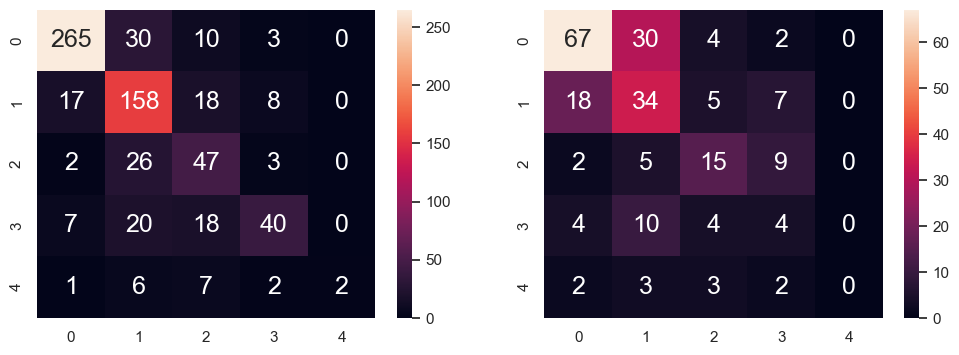

In [199]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0.5232954545454546, 0.9375, 'cp <= 3.5\ngini = 0.687\nsamples = 690\nvalue = [308, 201, 78, 85, 18]\nclass = 0'),
 Text(0.19488636363636364, 0.8125, 'chol <= 63.0\ngini = 0.418\nsamples = 322\nvalue = [240, 46, 15, 20, 1]\nclass = 0'),
 Text(0.045454545454545456, 0.6875, 'thalach <= 96.0\ngini = 0.751\nsamples = 33\nvalue = [8, 11, 7, 6, 1]\nclass = 1'),
 Text(0.03636363636363636, 0.5625, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0]\nclass = 3'),
 Text(0.05454545454545454, 0.5625, 'trestbps <= 117.5\ngini = 0.716\nsamples = 29\nvalue = [8, 11, 7, 2, 1]\nclass = 1'),
 Text(0.01818181818181818, 0.4375, 'thalach <= 151.5\ngini = 0.37\nsamples = 9\nvalue = [1, 7, 0, 1, 0]\nclass = 1'),
 Text(0.00909090909090909, 0.3125, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0, 0, 0]\nclass = 1'),
 Text(0.02727272727272727, 0.3125, 'thalach <= 167.0\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 0, 1, 0]\nclass = 0'),
 Text(0.01818181818181818, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 

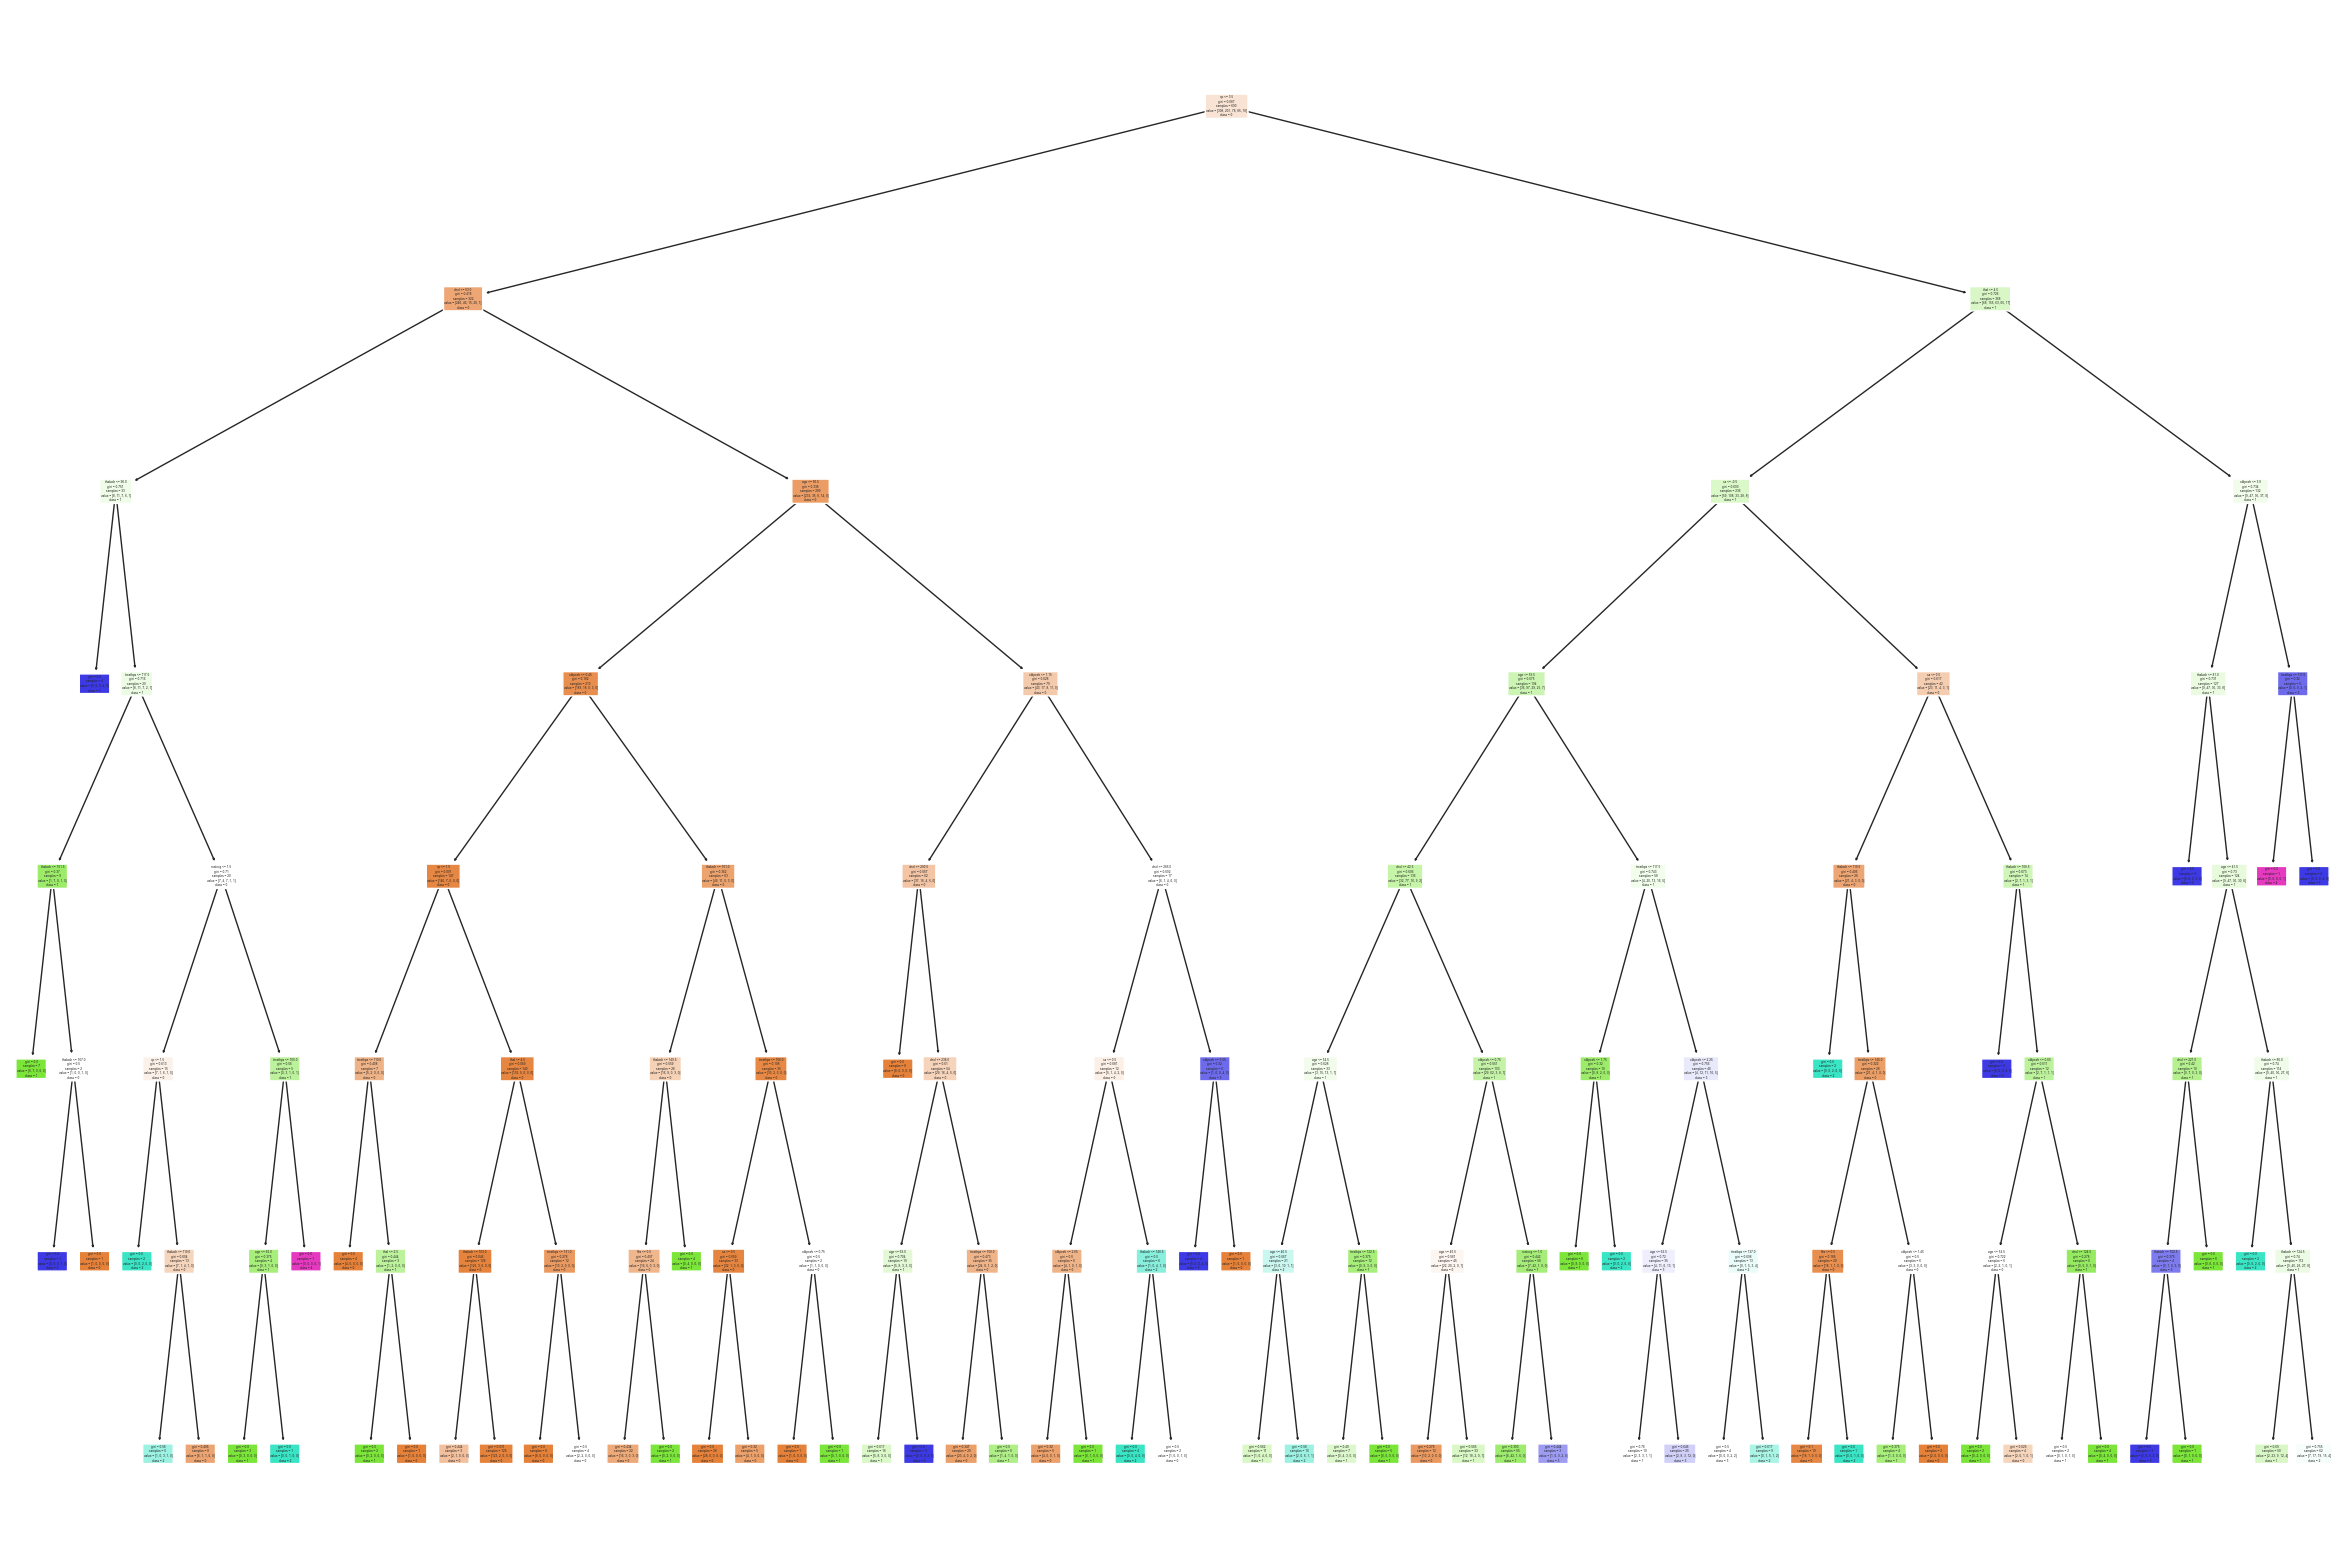

In [200]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(30,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["0","1", "2", "3", "4"])

In [185]:
clf = DecisionTreeClassifier().fit(X, y)
print(clf.feature_importances_)

[0.13118817 0.01858717 0.14109681 0.0992074  0.17050072 0.02827302
 0.04841322 0.1313354  0.0171257  0.10413212 0.02576074 0.03585881
 0.04852072]


In [186]:
from sklearn.feature_selection import RFE

# clf is the classifier (e.g., DecisionTreeClassifier) already defined
selector = RFE(clf, n_features_to_select=10)
selector = selector.fit(X, y)

# Indicates which features were selected
selected_features = selector.support_

# Ranking of features
ranking = selector.ranking_

ranking

array([1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1])

In [187]:
selected_features

array([ True, False,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True])

In [188]:
importance = [True, False,  True,  True,  True, True, True,  True, False, True, False,  True,  True, True]
selected_columns = combined_df.columns[importance]
filtered_df = combined_df[selected_columns]
filtered_df

,age,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,ca,thal,num
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,2.3,0.0,6.0,0
1,67.0,4.0,160.0,286.0,0.0,2.0,108.0,1.5,3.0,3.0,2
2,67.0,4.0,120.0,229.0,0.0,2.0,129.0,2.6,2.0,7.0,1
3,37.0,3.0,130.0,250.0,0.0,0.0,187.0,3.5,0.0,3.0,0
4,41.0,2.0,130.0,204.0,0.0,2.0,172.0,1.4,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,4.0,127.0,333.0,1,1,154.0,0.0,-1,-1,1
916,62.0,1.0,130.0,139.0,0,1,140.0,0.5,-1,-1,0
917,55.0,4.0,122.0,223.0,1,1,100.0,0.0,-1,6,2
918,58.0,4.0,130.0,385.0,1,2,140.0,0.5,-1,-1,0


In [189]:
# Extract Response and Predictors
filtered_predictors = ["age", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "oldpeak", "ca", "thal"]

y = pd.DataFrame(filtered_df['num'].astype('category'))
X = pd.DataFrame(filtered_df[filtered_predictors]) 

In [190]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=10)

In [191]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Ensure figures are displayed inline in Jupyter Notebook
%matplotlib inline

In [192]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6231884057971014

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5

